# Metropolis Hastings

Germán Cheuque.

In [52]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def Q(x, mu):
    return norm.pdf(x, mu, 2)

def P(x):
    return 4*norm.pdf(x, -1, 2) + 3*norm.pdf(x, 4, 2)

#plt.plot(L, R)
#plt.show()

In [37]:
I = 100000 #iterations
samples = []

x_t = 0

for t in range(I):

    x_try = np.random.normal(x_t, 2)
    alpha = min( (P(x_try)/P(x_t))*( Q(x_t, x_try)/Q(x_try, x_t) ) , 1)
    
    u = np.random.uniform(0,1)
    
    if u < alpha:
        samples.append(x_try)
        x_t = x_try
    else: samples.append(x_t)     

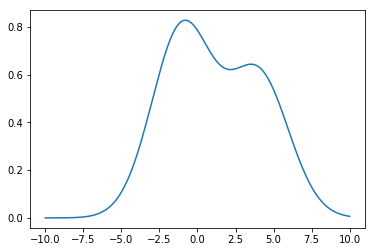

In [43]:
L = np.linspace(-10, 10, 1000)
R = [P(x) for x in L ]
plt.plot(L, R)
plt.show()

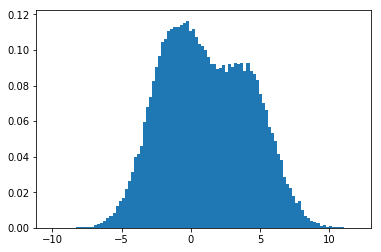

In [40]:
plt.hist(samples, bins = 100, density = True)
plt.show()

Usando un Burning period y eliminando la correlación de los parámetros

9800.0


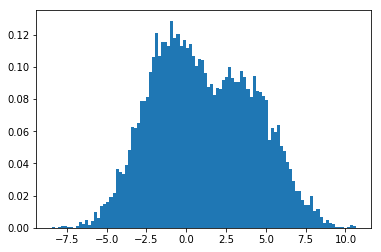

In [48]:
#Eliminando 2000 primeras muestras y una ventana de 10

samplesNew = samples[2000: ]
print(len(samplesNew)/10)
samplesNew = [samples[10*x] for x in range( int(len(samplesNew)/10) ) ]

plt.hist(samplesNew, bins = 100, density = True)
plt.show()

En general se eliminan algunas muestras extremas

4975.0


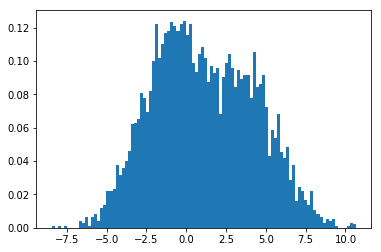

In [50]:
#Eliminando las 500 primeras muestras y una ventana de 50

samplesNew = samples[500: ]
print(len(samplesNew)/20)
samplesNew = [samples[20*x] for x in range( int(len(samplesNew)/20) ) ]

plt.hist(samplesNew, bins = 100, density = True)
plt.show()

18000.0


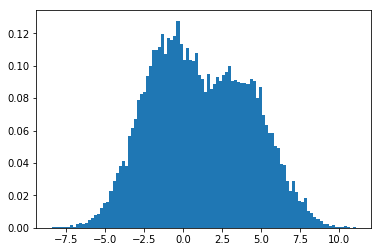

In [51]:
#Eliminando 10000 primeras muestras y una ventana de 5

samplesNew = samples[10000: ]
print(len(samplesNew)/5)
samplesNew = [samples[5*x] for x in range( int(len(samplesNew)/5) ) ]

plt.hist(samplesNew, bins = 100, density = True)
plt.show()